## Character Level Text Generation with RNN

Ref: https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/

In [8]:
import keras
import numpy as np

path = keras.utils.get_file('wonderland.txt',
    origin='https://www.gutenberg.org/files/11/11-0.txt')
text = open(path).read().lower()

180224/173595 [===============================] - 1s 3us/step


In [0]:
# text

In [10]:
len(text)

163817

In [11]:
# Length of extracted character sequences
MAX_LEN = 60

# We sample a new sequence every `step` characters
STEP = 3

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

for i in range(0, len(text) - MAX_LEN, STEP):
    sentences.append(text[i: i + MAX_LEN])
    next_chars.append(text[i + MAX_LEN])
print('Number of sequences:', len(sentences))

Number of sequences: 54586


In [12]:
sentences[:5]

['\ufeffproject gutenberg’s alice’s adventures in wonderland, by le',
 'oject gutenberg’s alice’s adventures in wonderland, by lewis',
 'ct gutenberg’s alice’s adventures in wonderland, by lewis ca',
 'gutenberg’s alice’s adventures in wonderland, by lewis carro',
 'enberg’s alice’s adventures in wonderland, by lewis carroll\n']

In [13]:
next_chars[0:5]

['w', ' ', 'r', 'l', '\n']

In [14]:
# List of unique characters in the corpus
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))

Unique characters: 61


In [0]:
# chars

In [0]:
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

In [0]:
# char_indices

In [18]:
# Next, one-hot encode the characters into binary arrays.
print('Vectorization...')
x = np.zeros((len(sentences), MAX_LEN, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Vectorization...


In [19]:
x[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True])

In [20]:
sentences[0][0]

'\ufeff'

In [21]:
char_indices['p']

45

In [22]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False])

In [23]:
next_chars[0]

'w'

In [24]:
char_indices['r']

47

In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(256, input_shape=(MAX_LEN, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [0]:
# model.summary()

In [0]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [30]:
temperature = 0.5
plot_x = np.linspace(0,1, 100)
plot_y_exp = np.exp(np.log(plot_x) / temperature)
sum(plot_y_exp)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


33.50168350168351

In [31]:
plot_y_exp = plot_y_exp/np.sum(plot_y_exp)
sum(plot_y_exp)

1.0000000000000002

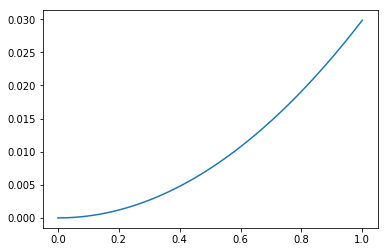

In [32]:
import matplotlib.pyplot as plt
plt.plot(plot_x, plot_y_exp)

In [33]:
np.random.multinomial(n=1, pvals=[0.1, 0.2, 0.3, 0.1], size=1)

array([[0, 1, 0, 0]])

In [34]:
# Fit the model for 1 epoch on the available training data
model.fit(x, y,
          batch_size=128,
          epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1
54586/54586 [==============================] - 215s 4ms/step - loss: 2.3753


In [35]:
import random

# Select a text seed at random
start_index = random.randint(0, len(text) - MAX_LEN - 1)
seed_text = text[start_index: start_index + MAX_LEN]
print('--- Generating with seed: "' + seed_text + '"')

--- Generating with seed: "e had not as yet had any
dispute with the queen, but she kne"


In [36]:
for temperature in [0.2, 0.5, 1.2]:
    print('------ temperature:', temperature)
    print(seed_text)
    
    generated_text = seed_text

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, MAX_LEN, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:] # update generated_text

        print(next_char, end = '')
    print()

------ temperature: 0.2
e had not as yet had any
dispute with the queen, but she kne
w the grow and the growing out it to the mouse the gett to the growing it to the pound to the got on the grow and here the prowing it muct gutenber the mouse to here the mouse the mouse to here the growing and the would the grow the got on the growing it muct gutenber the mouse to pear the reat the courd the got of and the mouse the grow and the mouse to the tor the growing and the courd to the gr
------ temperature: 0.5
e had not as yet had any
dispute with the queen, but she kne
a down muct gutenber it in the was gut i to the got seater lige and that to she the seared the ’
ander the not downel it wenter they would the ould the got on the catle with a muttere in wit would the moush preaing sopled hear here
ting on the got on the one sound and the wintion it the bear net on the grow am it dice ter to seat i
don the mouse the gut of the gut in tee on the moring but lown the
------ temperature: 1.2
e ha

In [37]:
preds

array([8.26623698e-04, 6.28136378e-03, 2.49593402e-04, 1.33929817e-07,
       1.49111159e-07, 1.59087634e-07, 5.99409868e-05, 1.18978707e-04,
       6.63068786e-05, 7.89746817e-04, 5.95871359e-04, 4.15366405e-04,
       8.19742763e-06, 1.38674227e-06, 2.32872830e-04, 6.40733788e-07,
       2.56157887e-06, 4.27039765e-07, 5.18851130e-06, 5.93386630e-07,
       2.26065552e-07, 1.11721454e-06, 2.37385439e-06, 1.03687140e-04,
       7.10231398e-05, 4.95107786e-04, 1.67834145e-07, 5.28426017e-06,
       4.30925274e-06, 9.84338385e-07, 8.26075673e-03, 1.10891582e-02,
       8.88009593e-02, 6.85237050e-02, 1.67811047e-02, 1.28532592e-02,
       7.58891180e-02, 3.36515345e-03, 1.56575888e-02, 1.42477732e-03,
       9.75090545e-03, 3.59969102e-02, 5.11677265e-02, 3.68444294e-01,
       1.56424455e-02, 6.36994839e-03, 3.35894088e-04, 1.65237822e-02,
       6.28537908e-02, 8.46856087e-02, 4.87926463e-03, 1.82212740e-02,
       3.01552890e-03, 4.08914697e-04, 2.33126245e-03, 1.30615127e-03,
      

In [38]:
sum(preds)

1.0000000653669758

## Ex: Larger LSTM

In [43]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(x.shape[1], x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
# define the checkpoint

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [44]:

# Fit the model for 1 epoch on the available training data
model.fit(x, y,
          batch_size=128,
          epochs=1)

Epoch 1/1
54586/54586 [==============================] - 545s 10ms/step - loss: 2.8345


In [45]:
import random

# Select a text seed at random
start_index = random.randint(0, len(text) - MAX_LEN - 1)
seed_text = text[start_index: start_index + MAX_LEN]
print('--- Generating with seed: "' + seed_text + '"')

--- Generating with seed: "

but her sister sat still just as she left her, leaning her"


In [46]:
for temperature in [0.2, 0.5, 1.2]:
    print('------ temperature:', temperature)
    print(seed_text)
    
    generated_text = seed_text

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, MAX_LEN, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:] # update generated_text

        print(next_char, end = '')
    print()

------ temperature: 0.2


but her sister sat still just as she left her, leaning her
 the the the the the the the soud so the and the she the the the the the the the the the the the the the she the the soun in and the sor the the the soun the the so the the the the the the the the the and and the the the the the so the the the the the the the the the the she the the the the the the the the the the soun the tor the the the the the the sind the the the the soun the the sout and the 
------ temperature: 0.5


but her sister sat still just as she left her, leaning her
 ing o me wad ate the th yuid the to an the saine be co at us on to soon the sot the the saind tha pot oce the por the cere and thore sol on the nou son at ou ot on ile the mand soo on beud the she the the the in the the this and thing she the withe thac wand in the and and the thin the sroor tho the menke gas in of the sot ind reilr the the soun tok mand the the souge too the sout in the hit ind 
------ temperature: 1.2


bu